## Exploring probability

In this notebook, we explore some ideas of probability that will help us make inference in the future. This workbook starts with an exercise building a data generating process that flips coins, recording "H" or "T". We then practice building statistics based on the flips. In this context, the word "statistic" just means some sort of numerical summary of a data set. Statistics can be really simple, like the number of rows in a table, or really complicated, like an accuracy measure of a fancy machine learning model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sequences import sequence_1, sequence_2

%matplotlib inline


In [2]:
def do_flips(n=100,seed=None) : 
    """
        Inputs: 
            * n is the number of simulations you want. 
            * seed is an integer that ensures reproducible input
    
        Outputs: 
            * a list of length `n` with randomly chosen Heads and Tails, marked with 
            "H" and "T".

    """

    if seed : 
        np.random.seed(seed)

    return np.random.choice(["H","T"],size=n,replace=True).tolist()


def print_flips(flips,col_width=10) : 
    """
        Given a list of flips, this function prints 
        them in columns col_width wide going down the page.
    """
    sublists = [flips[i:i+col_width] for i in range(0, len(flips), col_width)]

    output = "\n".join([" ".join(row) for row in sublists])
    
    print(output)

    # This functions return is a *side effect*. The printing of the flips.
    return None


## Exploring coin flips

Write a function that takes as input a list of "H" and "T", produced by your `do_flips` function and outputs the *number* of flips that came up heads. Run this 10-20 times flipping 10 coins. Then running 10-20 times flipping 100 coins. 

#### Question: 

* What seems more unusual? 3 heads out of 10 or 30 heads out of 100?  

In [3]:
def count_heads(flips) :
    """
        Returns the number of heads in a list or string.
    """

    head_count = 0
    for item in flips : 
        if item == "H" : 
            head_count += 1
    
    return head_count

    # I did it the above way to remind how iterating over a list can work
    # since you might need it below. But it's more efficient to do something
    # like this: return len([x for x in flips if x == "H"])

## Assertion statements are a great way to test your code. 
assert(count_heads("HHHHHTTTTT")==5)
assert(count_heads("H")==1)
assert(count_heads("T")==0)
assert(count_heads("HTHTHTHTHTHTHT")==7)


In [4]:
count_heads(do_flips(10))

5

In [5]:
count_heads(do_flips(100))

52

### Answer

3 out of 10 feels pretty common. 30 out of 100 never seems to happen. Anything in the 30s is very rare.

---

### A new statistic

In the space below, try to write a statistic that counts the number of times that two heads appear in sequence. So "HHHTHH" would have three squences in spots 0-1, 1-2, and 4-5.

In [ ]:
def count_two_heads(flips) : 

    last_flip = flips[0]
    two_heads_count = 0

    for idx in range(1,len(flips)) : 
        if last_flip == "H" and flips[idx] == "H" : 
            two_heads_count += 1

        last_flip = flips[idx]    

    return two_heads_count

assert(count_two_heads("HHHTHH")==3)
assert(count_two_heads("H")==0)
assert(count_two_heads("TTHHTTHHTTHH")==3)
assert(count_two_heads("HTHTHTHTHTHTHT")==0)
assert(count_two_heads("HHHHHTTTTTT")==4)


--- 

## Some Exploration

Call `count_heads` and `count_two_heads` on `sequence_1` and `sequence_2`, and some instances of `do_flips(100). Does anything stand out at this point?

In [7]:
print(count_two_heads(sequence_1))
print(count_two_heads(sequence_2))

18
34


In [8]:
flips = do_flips(100)
print(count_heads(flips))
print(count_two_heads(flips))

43
21


### Question: 

Does anything about our squences stand out in either of these statistics for you? 

---

### Simulations at scale

The beauty of exploring probability with computers is that we can do _lots_ of simulations to understand what's going on. Let's do 10,000 sequences of 10 and 100 coin flips respectively, so that we can look at the results. 

Side note: we're doing 10000 * 10 + 10000 * 100 coin flips, which is 1.1M coin flips. How long would that take you? 

In [9]:
heads_10 = []
heads_100 = []

for _ in range(10000) : 
    heads_10.append(count_heads(do_flips(10)))
    heads_100.append(count_heads(do_flips(100)))

In [10]:
# This is a pretty common way for me to make data frames. Use base Python
# to make lists or dictionaries, then put the results in a DF to get
# summary stats and plotting.

experiment_results = pd.DataFrame({"heads_10":heads_10,
                                   "heads_100":heads_100})

In [11]:
experiment_results['heads_10'].value_counts().sort_index()

heads_10
0        7
1      112
2      472
3     1155
4     2081
5     2487
6     1974
7     1184
8      416
9      101
10      11
Name: count, dtype: int64

In [12]:
experiment_results['heads_100'].value_counts().sort_index()
# Printing is not the way to go here

heads_100
30      1
32      3
33      3
34      2
35      9
36     13
37     33
38     48
39     62
40    107
41    145
42    225
43    279
44    395
45    432
46    560
47    665
48    756
49    809
50    813
51    773
52    731
53    690
54    568
55    497
56    403
57    304
58    231
59    170
60    101
61     68
62     47
63     20
64     22
65      7
66      6
67      1
68      1
Name: count, dtype: int64

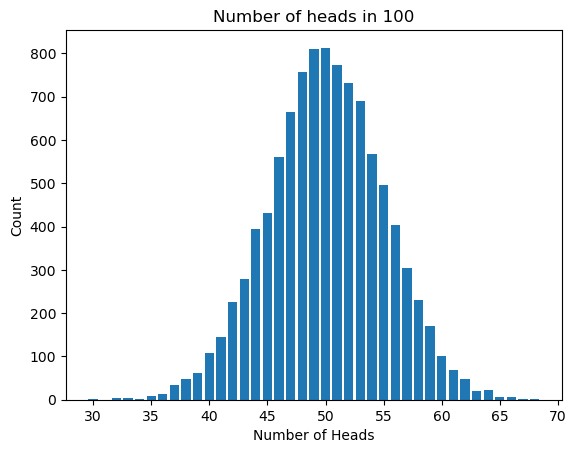

In [13]:
num_flips = 100

plt.bar(x = experiment_results['heads_100'].value_counts().index,
        height=experiment_results['heads_100'].value_counts())
plt.xlabel("Number of Heads")
plt.ylabel("Count")
plt.title(f"Number of heads in {num_flips}")

plt.show()

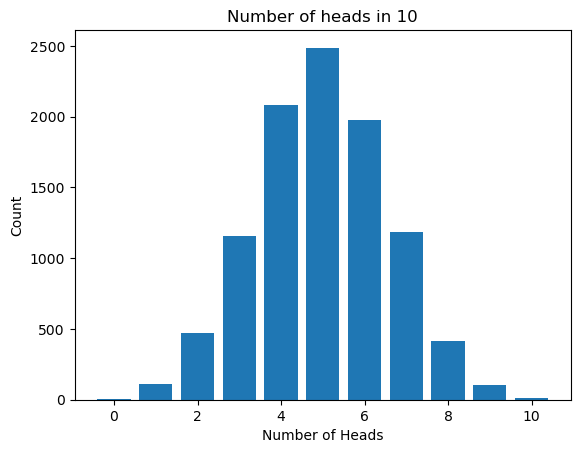

In [14]:
num_flips = 10

plt.bar(x = experiment_results['heads_10'].value_counts().index,
        height=experiment_results['heads_10'].value_counts())
plt.xlabel("Number of Heads")
plt.ylabel("Count")
plt.title(f"Number of heads in {num_flips}")

plt.show()

It's going to be handy to have a function that does this plotting, so I'm going to write one.

In [15]:
# A function to plot our simulations 

def plot_simulations(statistic_values, 
                     statistic_labels,
                     chart_title = None,  
                     test_value=None) : 
    """
        This function takes a statistic and it's x-axis label and builds 
        a bar chart of all the values. If you include a `test_value`, then 
        that value will get a vertical line on the chart and you'll learn
        what fraction of values are as extreme or more extreme than that value.
    
        You can also pass in a chart title.
    """

    plt.bar(x=statistic_labels, 
            height=statistic_values, 
            color="skyblue", 
            edgecolor="black")
    plt.xlabel("Statistical Value")
    plt.ylabel("Count")


    extremity = None
    if test_value is not None:
        mean_val = np.average(statistic_labels, weights=statistic_values)

        if test_value <= mean_val:
            extremity = np.sum(statistic_values[np.array(statistic_labels) <= test_value]) / np.sum(statistic_values)
            arrow_dir = -1  # arrow points left
        else:
            extremity = np.sum(statistic_values[np.array(statistic_labels) >= test_value]) / np.sum(statistic_values)
            arrow_dir = 1   # arrow points right

        ax = plt.gca()
        ymax = ax.get_ylim()[1]
        xmin, xmax = ax.get_xlim()
        offset = 0.2 * (xmax - xmin)  

        plt.axvline(x=test_value, color="red", linestyle="--",
                    label=f"{extremity:.2%} as extreme")


        # Add arrow annotation
        plt.annotate(
            "extreme tail",
            xy=(test_value, ymax*0.8),                         
            xytext=(test_value + arrow_dir*offset, ymax*0.8),   
            arrowprops=dict(facecolor="red", arrowstyle="<-"),
            color="red", ha="center"
        )

    if chart_title:
        plt.title(chart_title)

    if test_value is not None:
        plt.legend()

    plt.show()
    
    return extremity



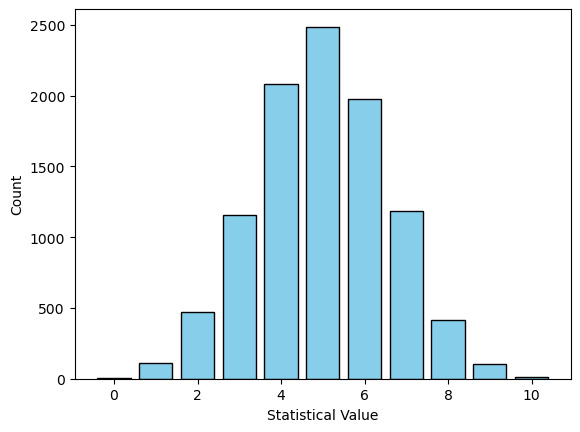

In [16]:
plot_simulations(experiment_results['heads_10'].value_counts(),experiment_results['heads_10'].value_counts().index)

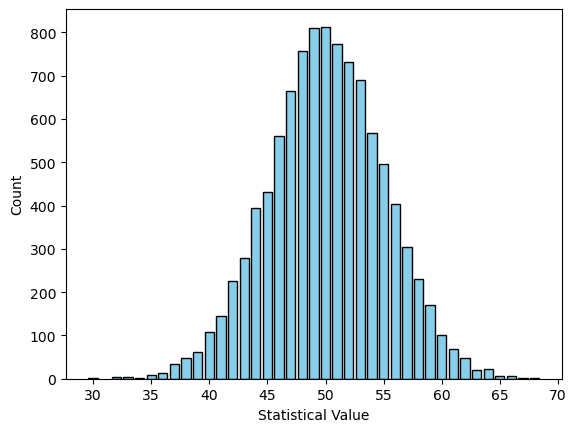

In [17]:
plot_simulations(experiment_results['heads_100'].value_counts(),experiment_results['heads_100'].value_counts().index)

---

# A Brief Diversion

It will be important for you to understand some of the power of the `random.random` function, which returns pseudo-random numbers from between 0 and 1. Use the cell below to generate some examples from this function.


In [18]:
np.random.random()

0.8983482908445642

Now use the cell below to write a function that allows you to simulate a coin with a probability of heads of something other than 50%. The easiest way is to generate a random value and compare it to your desired heads proportion. If the random value is smaller than the proportion, then mark the flip heads.

In [19]:
def do_flips_2(size,heads_probability=0.5,seed=None) : 

    if seed : 
        np.random.seed(seed)

    holder = [None] * size

    for idx in range(size) : 
        if np.random.random() < heads_probability : 
            holder[idx] = "H"
        else : 
            holder[idx] = "T"

    return holder

In [20]:
unfair_flips = []

for _ in range(1000) : 
    unfair_flips.append(count_heads(do_flips_2(100,heads_probability=1/30)))

experiment_results = pd.DataFrame({'heads':unfair_flips})



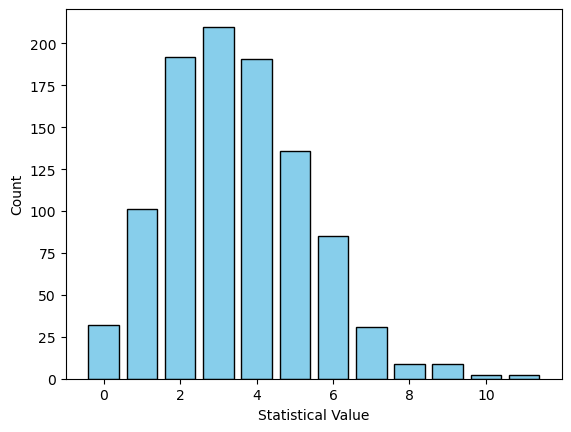

In [21]:
plot_simulations(experiment_results.value_counts("heads"),experiment_results.value_counts("heads").index)

--- 

### Looking at Rare Events

Let's return to our question: 

* What seems more unusual? 3 heads out of 10 or 30 heads out of 100?  

Let's regenerate the data and plot these, looking at our test values.

In [22]:
heads_10 = []
heads_100 = []

for _ in range(10000) : 
    heads_10.append(count_heads(do_flips(10)))
    heads_100.append(count_heads(do_flips(100)))

experiment_results = pd.DataFrame({'heads_10':heads_10,
                                  'heads_100':heads_100})

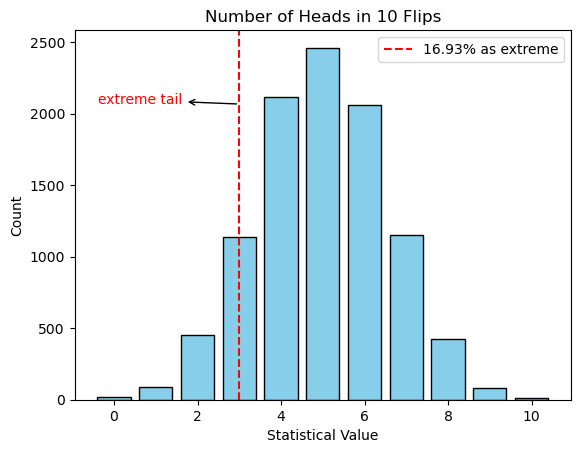

0.1693

In [23]:
plot_simulations(experiment_results['heads_10'].value_counts(),
                 experiment_results['heads_10'].value_counts().index,
                 chart_title = "Number of Heads in 10 Flips",
                 test_value=3)

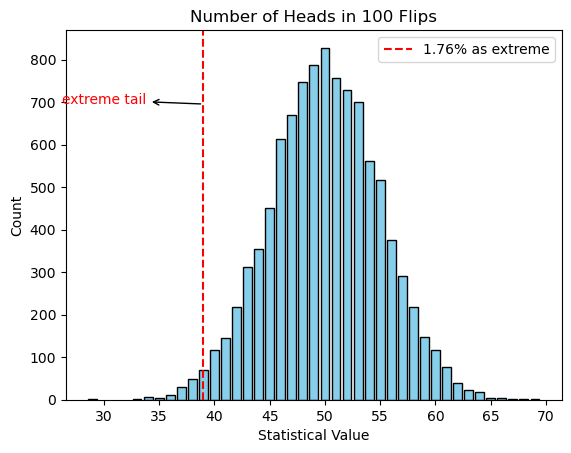

0.0176

In [24]:
plot_simulations(experiment_results['heads_100'].value_counts(),
                 experiment_results['heads_100'].value_counts().index,
                 chart_title = "Number of Heads in 100 Flips",
                 test_value = 39)

### Answer

It's *WAY* more common to get 3/10 heads than any heads total in the 30s. I had 16.7% of my 10-flip experiments with a value of 3 or lower. For 100 flips, even at 39 heads we only have 1.9% values that low or lower. I had zero at 30! (It feels like 35 is probably the "correct" number to use here to compare to 3 on the 10 point scale.)


## Two sequences

You've been given two sequences. One of them isn't really random. Let's see if we can differentiate them based on number of heads.

In [25]:
print(f"Sequence 1 has {count_heads(sequence_1)} heads.")
print(f"Sequence 2 has {count_heads(sequence_2)} heads.")

Sequence 1 has 54 heads.
Sequence 2 has 56 heads.


Doesn't look very likely that we'll differentiate them based on heads! But let's run them through.

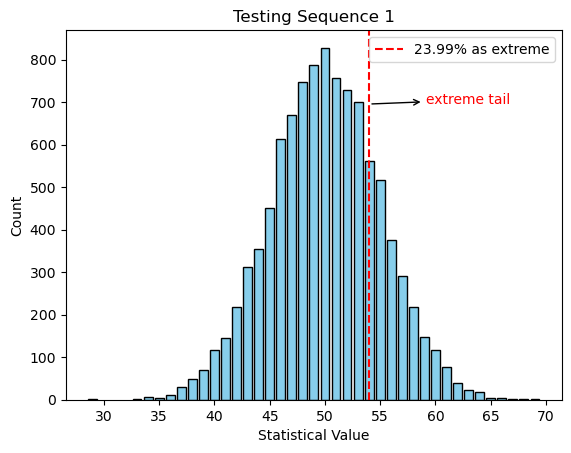

0.2399

In [26]:
plot_simulations(experiment_results["heads_100"].value_counts(),
                 experiment_results["heads_100"].value_counts().index,
                 test_value=count_heads(sequence_1),
                 chart_title="Testing Sequence 1")

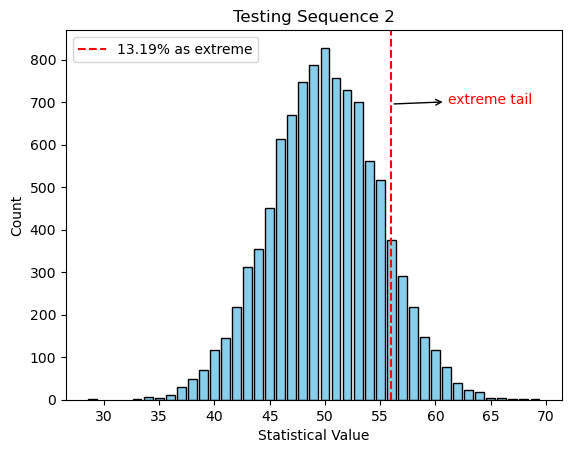

0.1319

In [27]:
plot_simulations(experiment_results["heads_100"].value_counts(),
                 experiment_results["heads_100"].value_counts().index,
                 test_value=count_heads(sequence_2),
                 chart_title="Testing Sequence 2")

## Observations

Sequence 2 _is_ a bit more extreme, but it's still not very extreme.

## Custom Statistics

Think about some statistics that might differentiate the fake data from the real. Build functions for them and see if you can find something that's significant.

In [28]:
def get_longest_run(flips) : 
    """"
        Given a list of heads and tails, this returns the longest run in the data. 
    """

    max_heads = 0
    max_tails = 0

    current_count = 0
    last_item = ""
    for item in flips : 
        if not last_item : 
            last_item = item


        if  last_item == item : 
            current_count += 1
            last_item = item

        else : 
            # Run is over
            if item == "H" and current_count > max_heads : 
                max_heads = current_count 
            elif item == "T" and current_count > max_tails : 
                max_tails = current_count

            current_count = 0

    return(max(max_heads, max_tails))


def get_switches(flips) : 
    """
        How many switches back and forth?
    """

    switches = 0
    last_item = ""
    for item in flips : 
        if last_item : # don't count 0th spot as a switch 
            if item != last_item : 
                switches += 1
             
        last_item = item

    return switches


In [29]:
runs = []
switches = []
num_sims = 10000

for _ in range(num_sims) : 
    this_sequence = do_flips(100)
    runs.append(get_longest_run(this_sequence))
    switches.append(get_switches(this_sequence))



experiment_results = pd.DataFrame({"runs":runs,
                                   "switches":switches})    

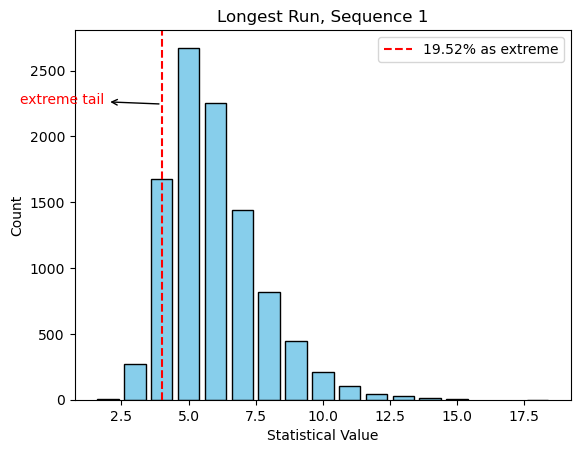

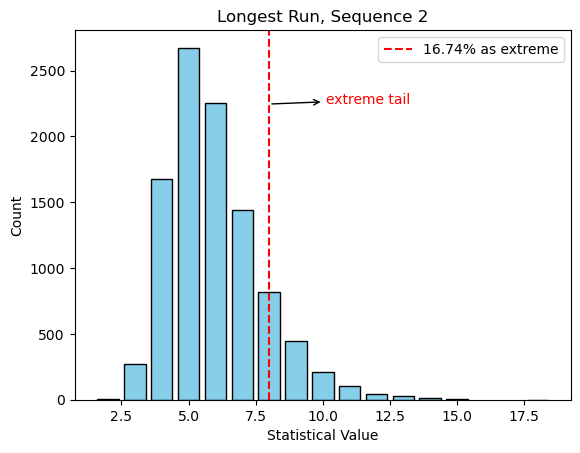

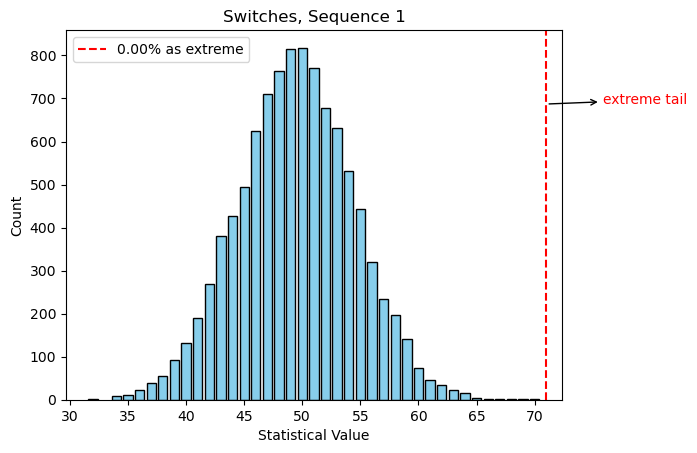

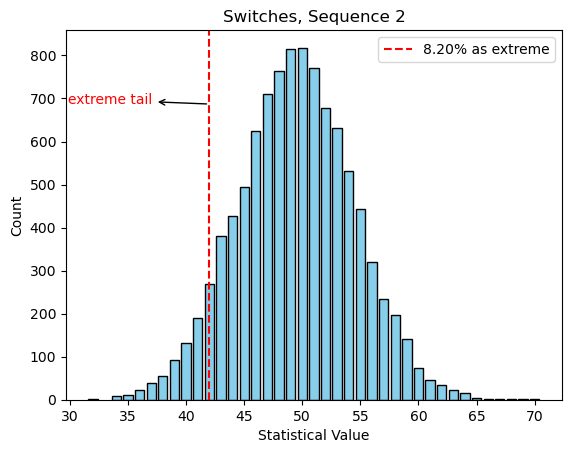

0.082

In [30]:
plot_simulations(experiment_results['runs'].value_counts(),
                 experiment_results['runs'].value_counts().index,
                 test_value = get_longest_run(sequence_1),
                 chart_title = "Longest Run, Sequence 1")


plot_simulations(experiment_results['runs'].value_counts(),
                 experiment_results['runs'].value_counts().index,
                 test_value = get_longest_run(sequence_2),
                 chart_title = "Longest Run, Sequence 2")


plot_simulations(experiment_results['switches'].value_counts(),
                 experiment_results['switches'].value_counts().index,
                 test_value = get_switches(sequence_1),
                 chart_title = "Switches, Sequence 1")


plot_simulations(experiment_results['switches'].value_counts(),
                 experiment_results['switches'].value_counts().index,
                 test_value = get_switches(sequence_2),
                 chart_title = "Switches, Sequence 2")



In [31]:
experiment_results['runs'].value_counts().sort_index()

runs
2        2
3      272
4     1678
5     2674
6     2255
7     1445
8      815
9      445
10     212
11     108
12      47
13      27
14      10
15       9
18       1
Name: count, dtype: int64

## Results

Typically "longest run" will be dispositive. It's rare for hand-generated data to have a run as long as 5, whereas it's pretty common for random data. But in this case it is the switches that really differentiate the sequences. And Sequence 1 really was typed by me. 